In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [12]:
def image(pic):
    img=cv2.imread(pic)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # bascially we get images in bgr format so we need to convert to rgb format
    plt.imshow(img)
    plt.show()
    return img

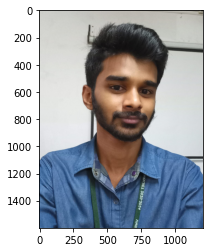

In [13]:
pic="images.jpg"
img=image(pic)
org_img=np.copy(img)

In [14]:
def edge_mask(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # to convert rgb to gray clr
    gray_blur=cv2.medianBlur(gray,blur_value)
    
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY,line_size,blur_value)
    return edges

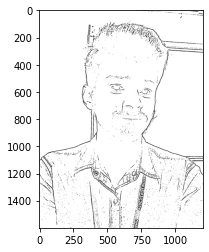

In [15]:
line_size,blur_value=7,5
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

In [16]:
def color_quantization(img, k):   
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2. TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret,label,center=cv2.kmeans(data, k, None ,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result


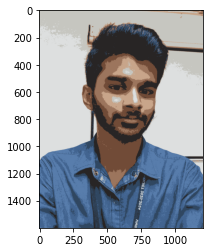

In [17]:
img=color_quantization(img, k=9)

plt.imshow(img)
plt.show()


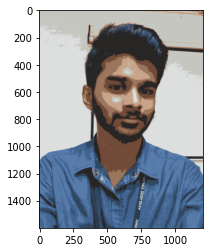

In [18]:
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()


In [19]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    plt.imshow(c)
    plt.show()

    plt.imshow(org_img)
    plt.show()


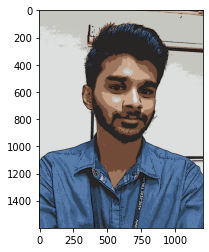

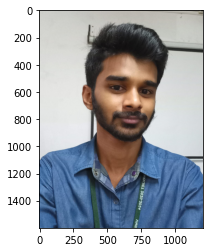

In [20]:
cartoon()
